In [51]:
path="C:\\Users\\shwet\\Desktop\\myData\\myData"


In [52]:
labelsFile="C:\\Users\\shwet\\Desktop\\labels.csv"

In [53]:
import os
import cv2


In [54]:
myList=os.listdir(path)

In [55]:
noOfClasses=len(myList)

In [56]:
noOfClasses

43

In [57]:
images=[]
classNo=[]
print("Importing Classes...")
for i in range(0,noOfClasses):
    myPicList=os.listdir(path + "/" + str(i))
    for y in myPicList:
        Img=cv2.imread(path + "/" + str(i) + "/" + y)
        images.append(Img)
        classNo.append(i)
    print(i, " Done")
                       
    
    

                       
                    
                       

Importing Classes...
0  Done
1  Done
2  Done
3  Done
4  Done
5  Done
6  Done
7  Done
8  Done
9  Done
10  Done
11  Done
12  Done
13  Done
14  Done
15  Done
16  Done
17  Done
18  Done
19  Done
20  Done
21  Done
22  Done
23  Done
24  Done
25  Done
26  Done
27  Done
28  Done
29  Done
30  Done
31  Done
32  Done
33  Done
34  Done
35  Done
36  Done
37  Done
38  Done
39  Done
40  Done
41  Done
42  Done


In [58]:
import numpy as np

In [59]:
images=np.array(images)
classNo=np.array(classNo)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test=train_test_split(images,classNo,test_size=0.2)

In [62]:
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2)

In [63]:
X_train.shape

(22271, 32, 32, 3)

In [64]:
import pandas as pd
data=pd.read_csv("C:\\Users\\shwet\\Desktop\\labels.csv")

In [65]:
data

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [66]:
import matplotlib.pyplot as plt
import random

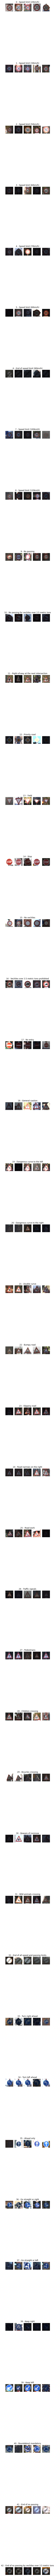

In [67]:
num_of_samples=[]
cols=5
num_Classes=noOfClasses
fig,axs=plt.subplots(nrows=num_Classes,ncols=cols,figsize=(5,300))
for i in range(cols):
    for j,row in data.iterrows():
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:])
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - " + row["Name"])
            num_of_samples.append(len(x_selected))

In [68]:
def grayscale(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img=cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img=grayscale(img)
    img=equalize(img)
    img=img/255
    return img
    

In [69]:
X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))


In [70]:
cv2.imshow("Grayscale Image",X_train[random.randint(0,len(X_train)-1)])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [71]:
X_train.shape

(22271, 32, 32)

In [72]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)

In [73]:
X_validation=X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

In [74]:
X_test.shape

(6960, 32, 32, 1)

In [75]:
from keras.preprocessing.image import ImageDataGenerator

In [76]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [77]:
dataGen.fit(X_train)

In [78]:
batches=dataGen.flow(X_train,y_train,batch_size=20)

In [79]:
X_batch,y_batch=next(batches)

In [80]:
imageDimensions=(32,32,3)

In [81]:
X_batch.shape

(20, 32, 32, 1)

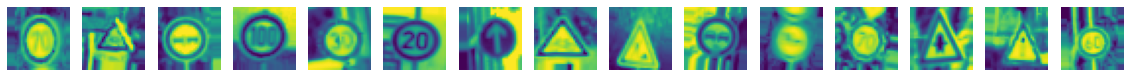

In [82]:
fig,axs=plt.subplots(1,15,figsize=(20,5))
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32,32))
    axs[i].axis("off")
plt.show()

In [83]:
from keras.utils.np_utils import to_categorical

In [84]:
y_train.shape

(22271,)

In [85]:
y_train=to_categorical(y_train,noOfClasses)

In [86]:
y_train.shape

(22271, 43)

In [87]:
y_validation=to_categorical(y_validation,noOfClasses)

In [88]:
y_test=to_categorical(y_test,noOfClasses)

In [89]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam

In [90]:
X_train.shape

(22271, 32, 32, 1)

In [91]:
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [92]:
def myModel():
    model=Sequential()
    model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation="relu"))
    model.add(Conv2D(60,(5,5),activation="relu"))
    model.add(Conv2D(60,(5,5),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(500,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(43,activation="softmax"))
    model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
    return model
    
    

In [93]:
model=myModel()

In [94]:
history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=50),epochs=35)

C:\Users\shwet\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
446/446 [==============================] - 128s 284ms/step - loss: 3.3027 - accuracy: 0.1142
Epoch 2/35
446/446 [==============================] - 123s 276ms/step - loss: 1.7202 - accuracy: 0.4744
Epoch 3/35
446/446 [==============================] - 134s 301ms/step - loss: 1.0843 - accuracy: 0.6650
Epoch 4/35
446/446 [==============================] - 135s 304ms/step - loss: 0.8150 - accuracy: 0.7404
Epoch 5/35
446/446 [==============================] - 142s 317ms/step - loss: 0.6516 - accuracy: 0.7921
Epoch 6/35
446/446 [==============================] - 135s 303ms/step - loss: 0.5282 - accuracy: 0.8320
Epoch 7/35
446/446 [==============================] - 120s 268ms/step - loss: 0.4979 - accuracy: 0.8430
Epoch 8/35
446/446 [==============================] - 120s 268ms/step - loss: 0.4385 - accuracy: 0.8664
Epoch 9/35
446/446 [==============================] - 120s 270ms/step - loss: 0.3883 - accuracy: 0.8794
Epoch 10/35
446/446 [==============================] - 123s 276m

In [95]:
import numpy as np
import cv2

 

def getCalssName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'


In [96]:
cap=cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)
cap.set(10,180)


True

In [97]:
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    success,imgOriginal=cap.read()
    img=np.asarray(imgOriginal)
    img=cv2.resize(img,(32,32))
    img=preprocessing(img)
    cv2.imshow("Processed Image",img)
    img=img.reshape(1,32,32,1)
    cv2.putText(imgOriginal,"Class: ",(20,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.putText(imgOriginal,"Probability: ",(20,75),font,0.75,(0,0,255),2,cv2.LINE_AA)
    predictions=model.predict(img)
    classIndex=model.predict_classes(img)
    probabilityValue=np.amax(predictions)
    if probabilityValue>0.75:
        cv2.putText(imgOriginal,str(classIndex) + " "+ str(getCalssName(classIndex)),(120,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
        cv2.putText(imgOriginal,str(round(probabilityValue*100,2)) + "%",(120,150),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.imshow("Result",imgOriginal)
    if cv2.waitKey(1)==113:
        cv2.destroyAllWindows()
        cap.release()
        break

C:\Users\shwet\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [98]:
cap.release()
